<h1 align="center">Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
data = pd.read_csv('household_power_consumption.csv', header=0, index_col='datetime', infer_datetime_format=True,
                  parse_dates=['datetime'])
data.head()

,global_active_power,global_reactive_power,voltage,global_intensity,active_energy_kitchen,active_energy_laundry,active_energy_control,active_energy_other
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [13]:
str(data.index[0])[11:]

'17:24:00'

<h1 align="center">Observation of Household Energy Consumption through Time</h1>

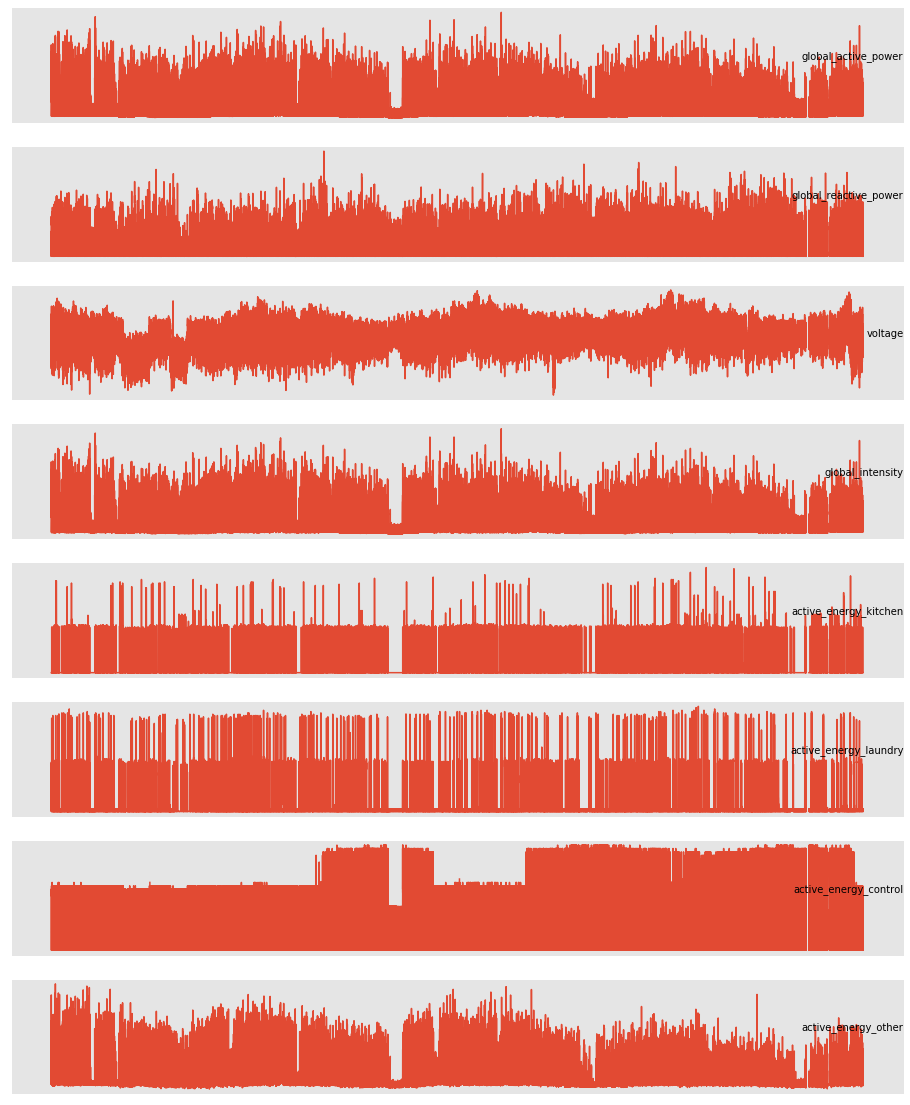

In [3]:
import matplotlib.pyplot as plt

values = data.values
fontsize = {'fontsize': 10}
# specify columns to plot
groups = [x for x in range(0,8)]
i = 1
plt.style.use('ggplot')
plt.figure(figsize = (16,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.5, loc='right', fontdict=fontsize)
    i += 1
    plt.yticks([])
    plt.xticks([])
    
plt.show();

### Some notes on the plots
* Some seasonality can be seen in the first four plots
* Slight decrease on average in power, voltage, intensity over the four years
* Less seasonality in the locational energy demands, data is quite constant over time and moves in steps
* Some seasonality in active_energy_other, but seems to also be decreasing over time


### *For now, it looks quite noisy, could potentially separate the data by years*


<h2 align="center">Yearly Plots</h2>

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


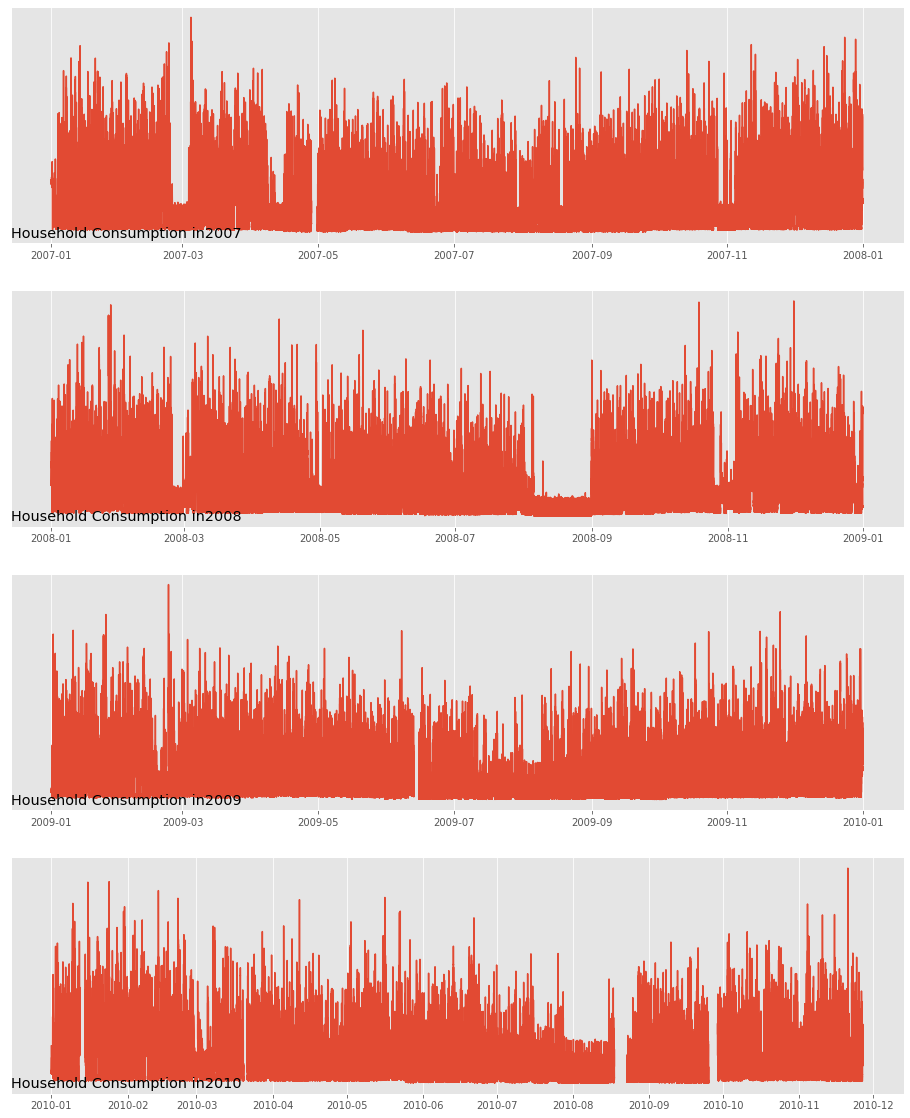

In [4]:
# looking at yearly plots for power consumption
# dataset starts at the end of 2006 up until the end of 2010, so can just use the four years below
years = ['2007', '2008', '2009', '2010']

plt.figure(figsize = (16,20))
def year_plots():
    for i in range(len(years)):
        #creating subplots
        ax = plt.subplot(len(years), 1, i+1)
        #specifying the year
        year = years[i]
        #getting the data for the given year
        year_data = data[str(year)]
        #plotting global active power for each year
        plt.plot(year_data['global_active_power'])
        #adding a title
        plt.title("Household Consumption in" + str(year), y=0, loc = 'left')
        plt.yticks([])

year_plots()

Seems to be seasonality in this plot year-on-year
* Higher consumption in winter/colder periods
* As years have progressed, the effect of seasonality is 
* Missing data in first, third and fourth years

### *May be worth looking at consumption per month*

<h2 align="center">Monthly Plots</h2>

In [5]:
# creating a list of each month 1-12
months = [%.2d % x for x in range(1,13)]

plt.figure(figsize = (16,20))
def month_plots(data, year):
    """
    Arguments:
    data: dataframe
    year: string of year
    """
    plt.figure(figsize = (16,20))
    for i in range(len(months)):
        #creating subplots
        ax = plt.subplot(len(months), 1, i+1)
        #specifying the year
        month = year +'-' + str(months[i])
        #getting the data for the given year
        month_data = data[str(month)]
        #plotting global active power for each year
        plt.plot(month_data['global_active_power'])
        #adding a title
        plt.title(year + "Household Consumption in" + str(month), y=0, loc = 'left', fontdict=fontsize)
        plt.yticks([])

<Figure size 1152x1440 with 0 Axes>

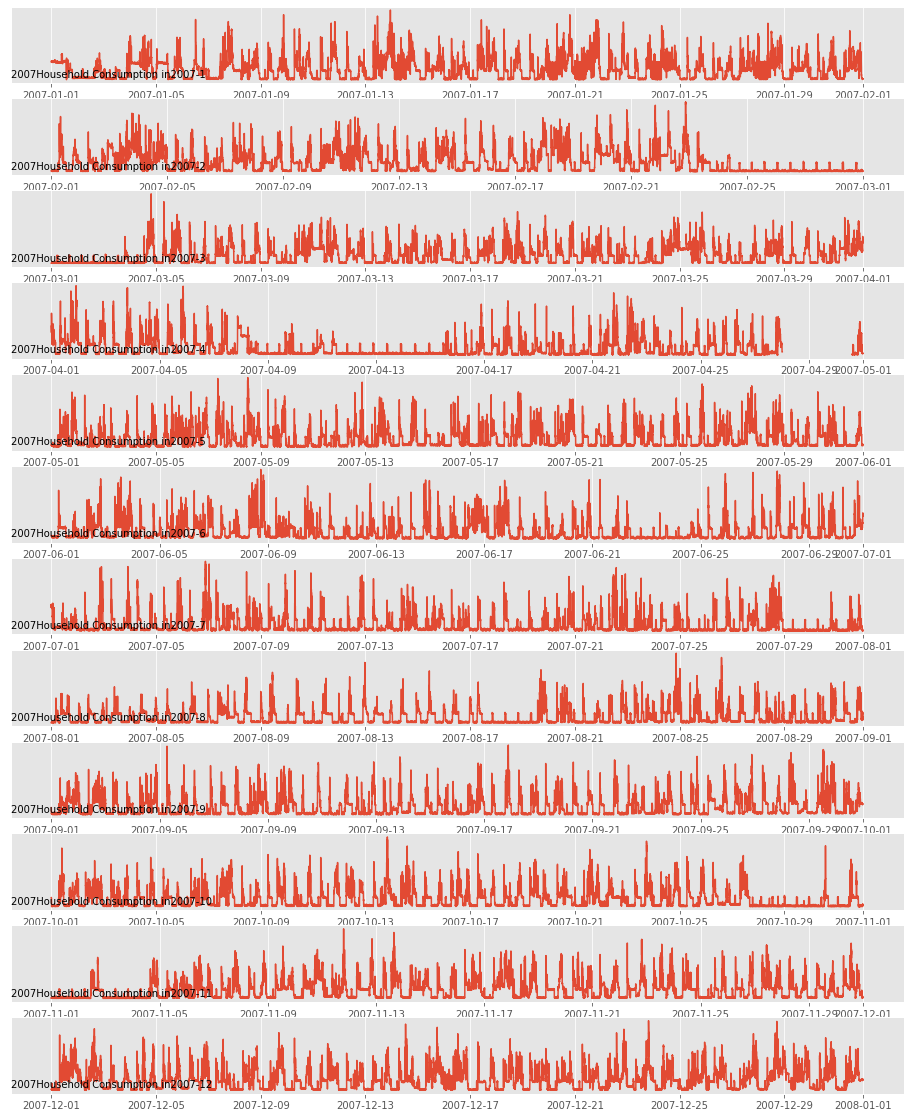

In [6]:
month_plots(data=data, year='2007')

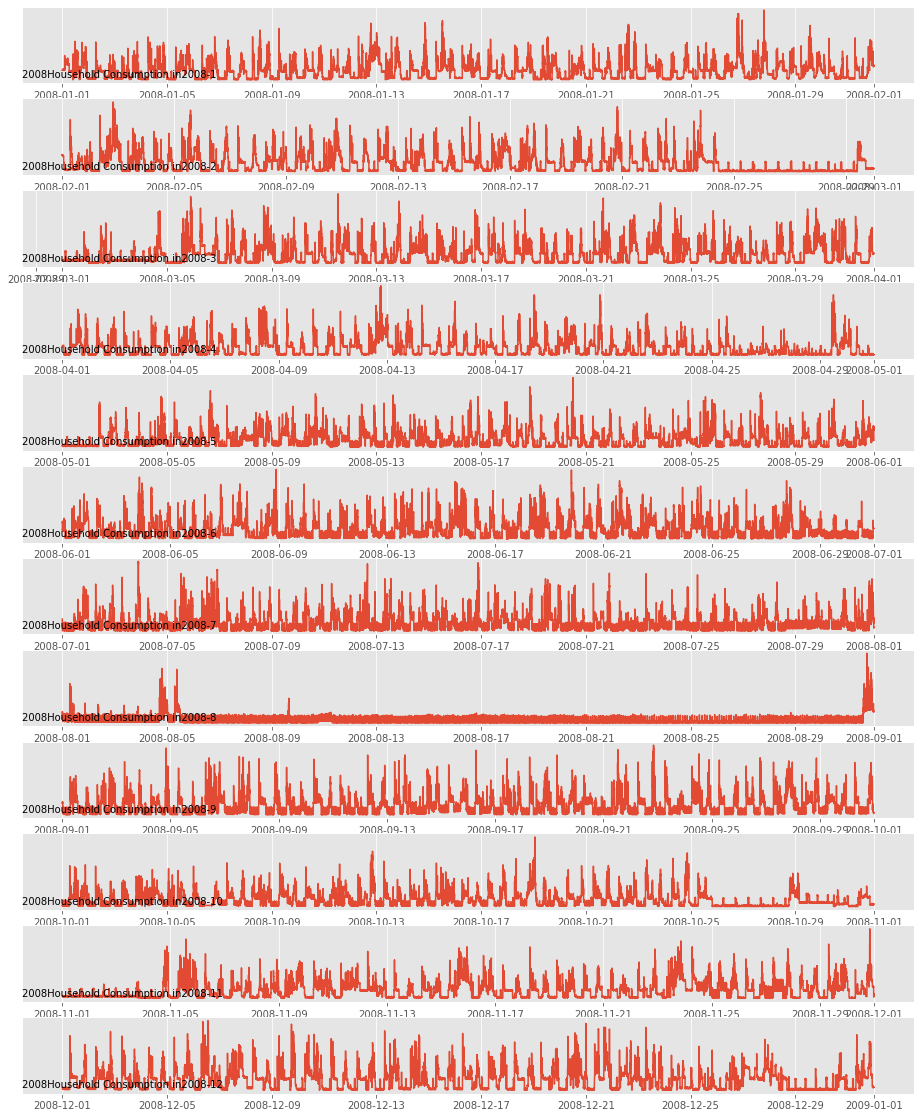

In [7]:
month_plots(data=data, year='2008')

So, from these graphs we can interpret several things:
* Not only is there seasonality in household consumption, there are also daily patterns
    * i.e. we would tend to think that at night consumption may be lower than during the day because this is when people are asleep
* There are several periods where consumption is exceptionally low, but not null values, so this could possibly be due to holidays, where houses were unoccupied and thus not consuming any power

### *To further explore these interpretations, I will create plots that show daily consumption*

<h2 align="center">Daily Plots</h2>

In [8]:
days = ["%.2d" % x for x in range(1,29)]


def day_plots(data, year, month):
    """
    Arguments:
    data: dataframe
    year: string of year
    month: string of month
    """
    plt.figure(figsize = (16,40))
    for i in range(len(days)):
        #creating subplots
        ax = plt.subplot(len(days), 1, i+1)
        #specifying the year
        day = year +'-' + month + '-' + str(days[i])
        #getting the data for the given year
        day_data = data[str(day)]
        #plotting global active power for each year
        plt.plot(day_data['global_active_power'])
        #adding a title
        plt.title(day, y=0, loc = 'left', fontdict=fontsize)
        plt.yticks([])

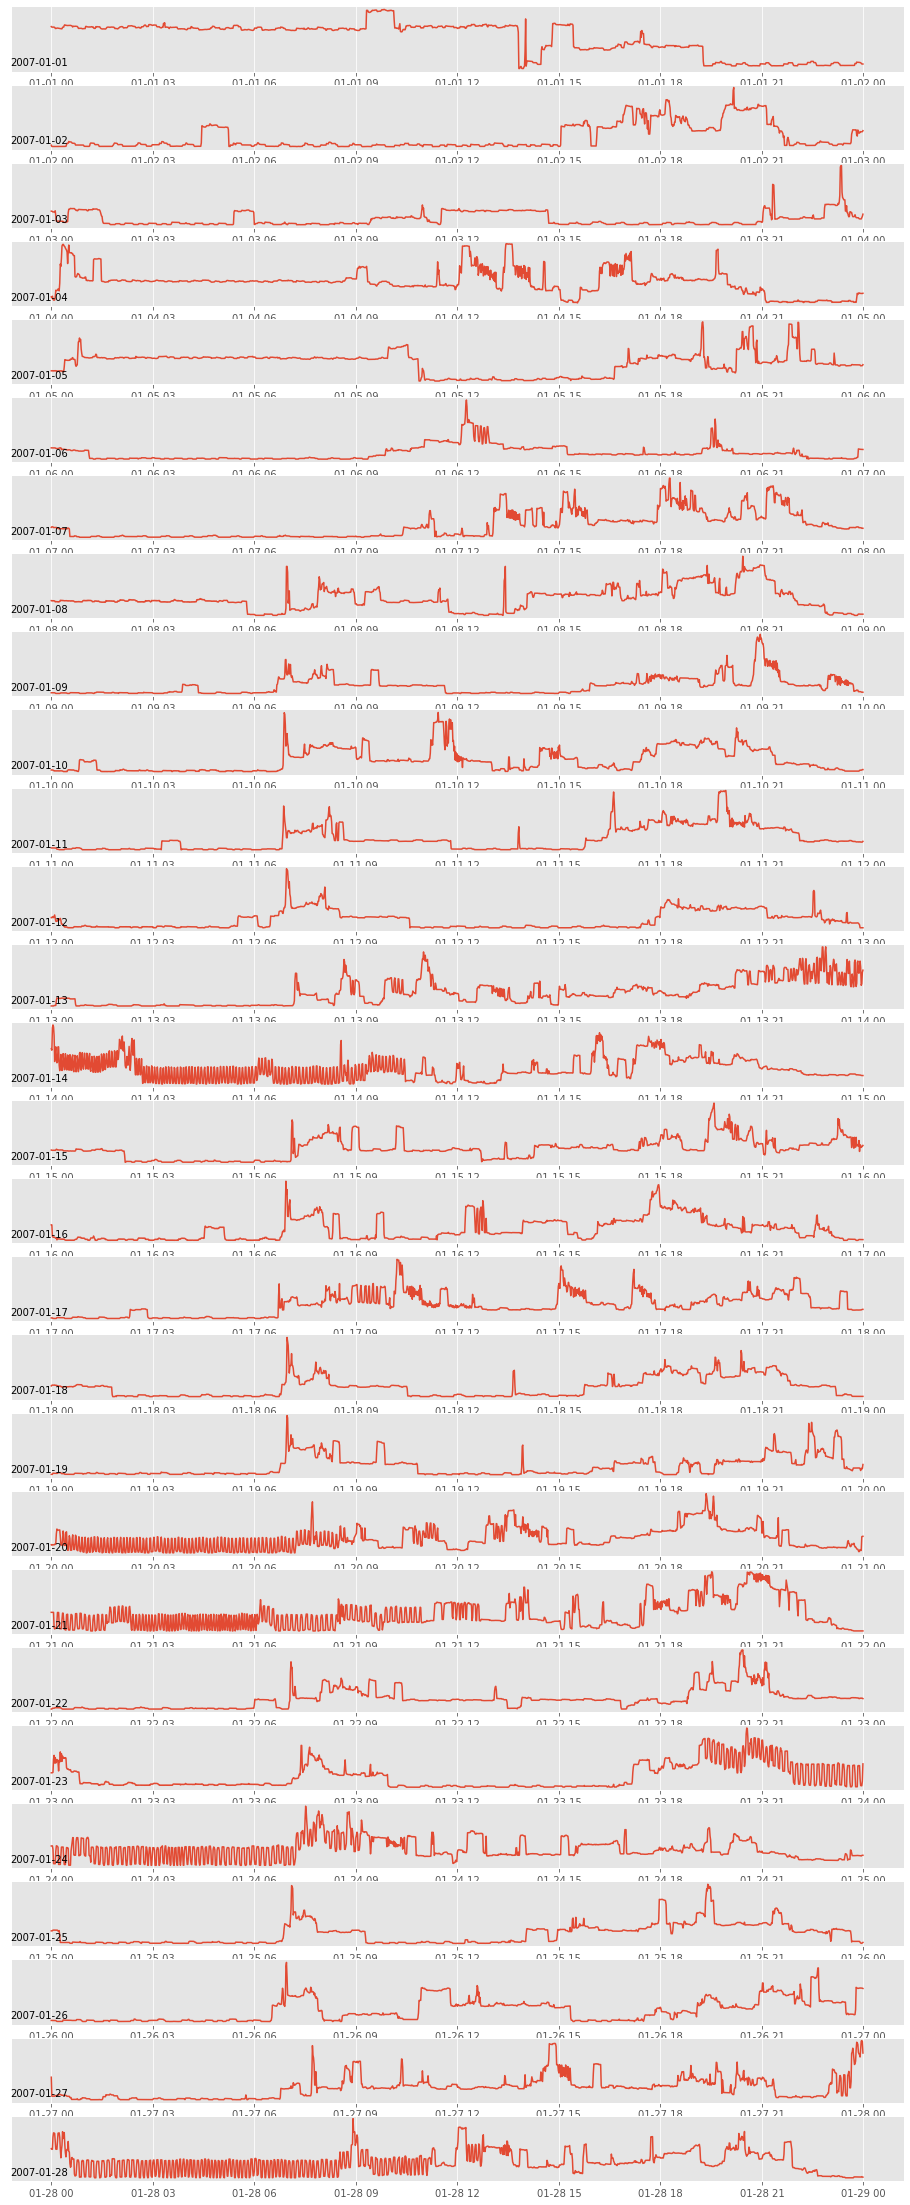

In [9]:
# looking at a winter month in 2007
day_plots(data=data, year='2007', month='01')

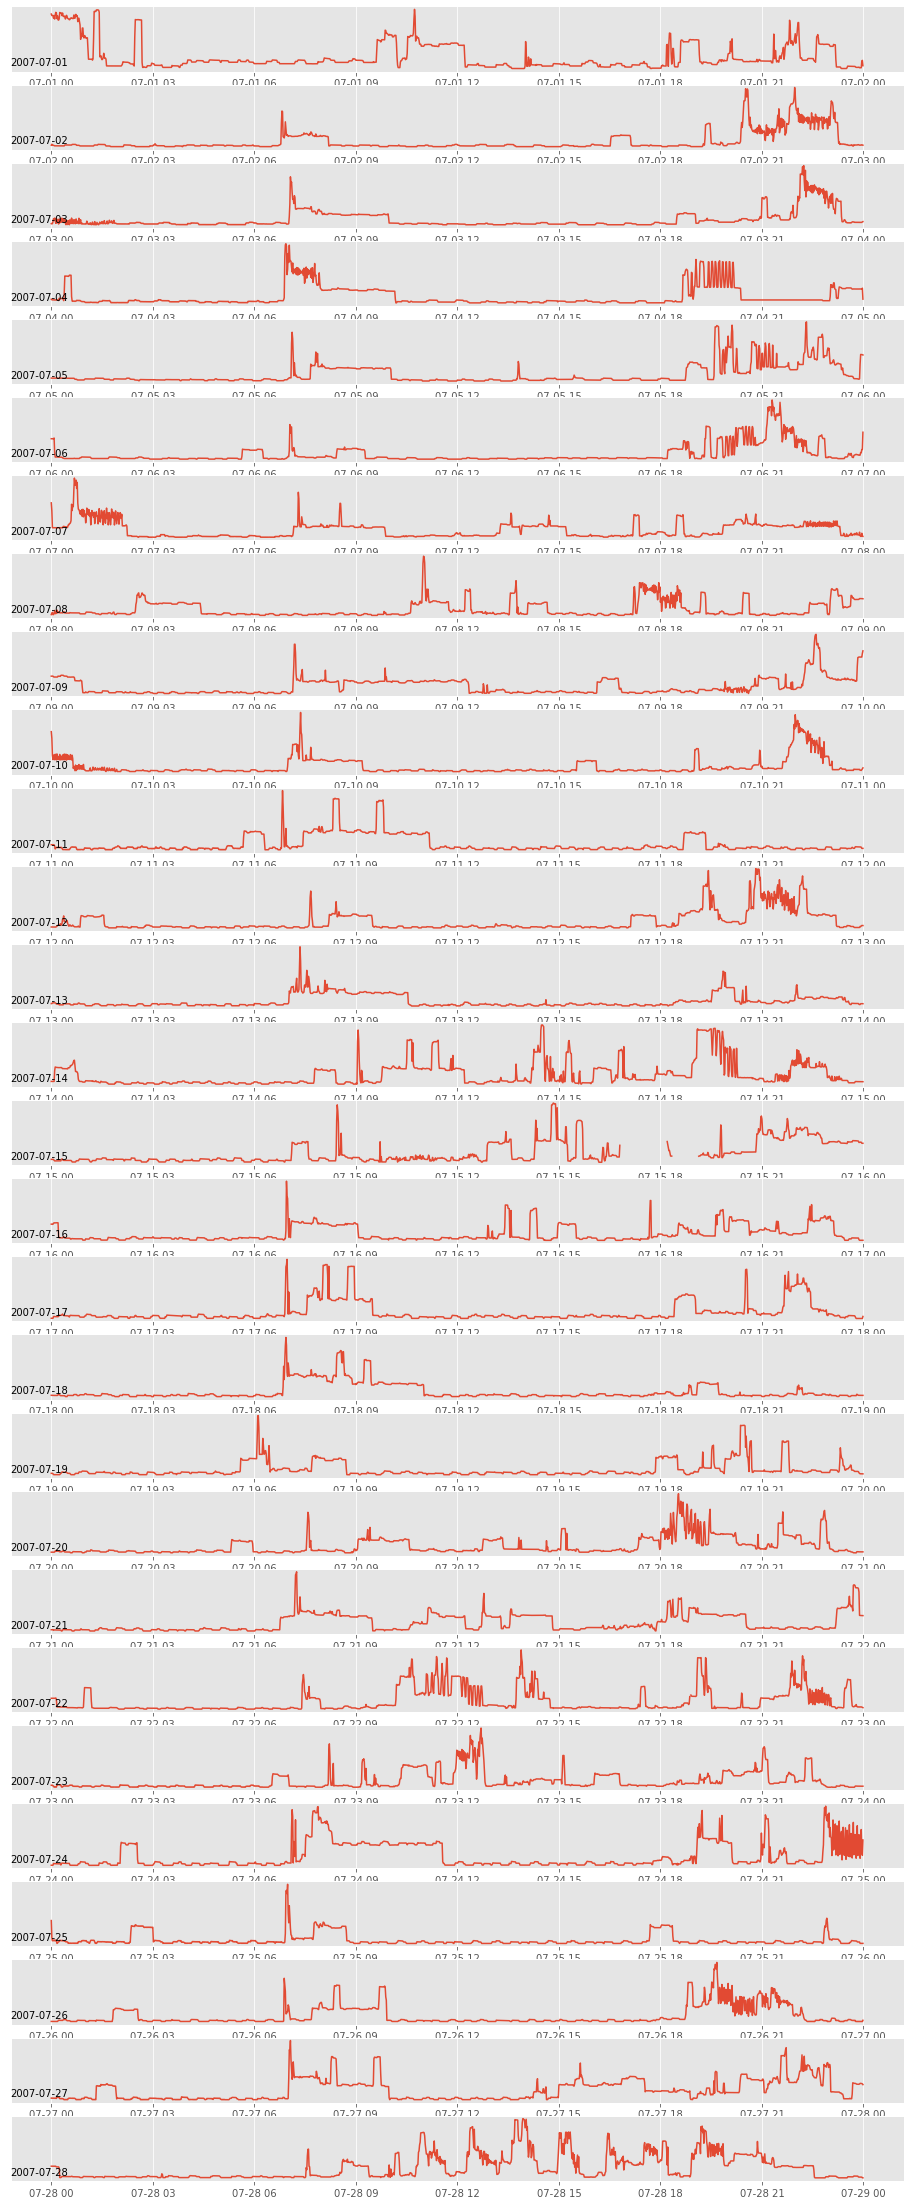

In [10]:
# looking at a summer month in 2007
day_plots(data=data, year='2007', month='07')

The interpretations we previously made, concerning daily patterns, is all but confirmed with these plots
* In the winter month, there seems to be strong overnight consumption on some days, and generally with consumption throughout the day
* In summer months, less overnight consumption, peaks in consumption throughout day starting with the morning. Would say that most of the heavy consumption takes place during the evenings

### Try to find averages and stuff for the graphs above

<h1 align="center">Distributional Analysis of Data</h1>

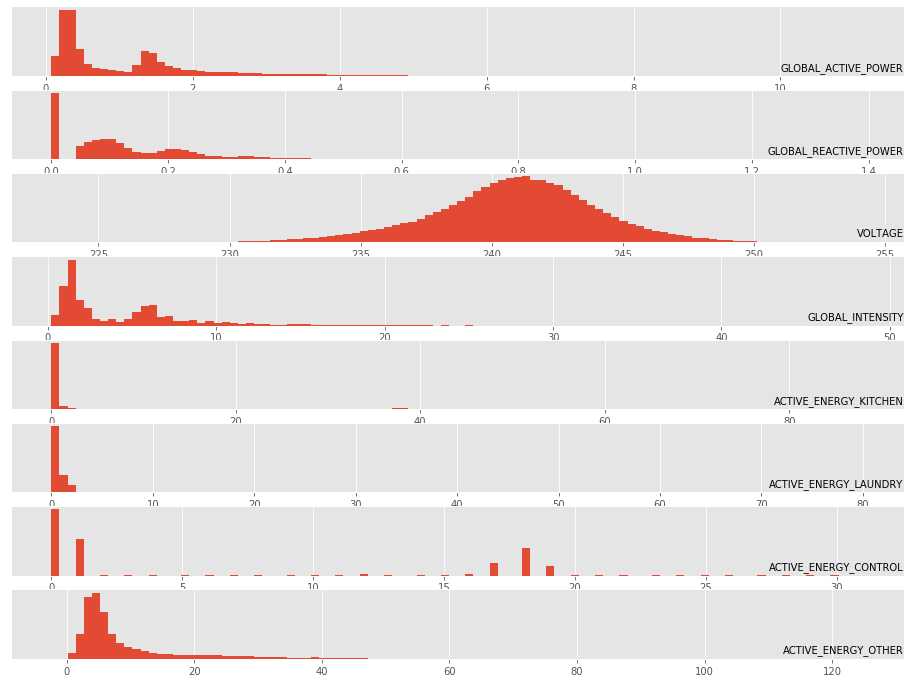

In [11]:
# A good tool to check for the distribution of data is to use histograms

groups = [x for x in range(0,8)]

def distribution_plot(data):
    plt.figure(figsize=(16,12))
    for i in range(len(data.columns)):
        ax = plt.subplot(len(data.columns), 1, i+1)
        #specifying the year
        variable = data.columns[i]
        #getting the data for the given year
        data[variable].hist(bins=100)
        #plotting global active power for each year
        #adding a title
        plt.title(variable.upper(), y=0, loc = 'right', fontdict=fontsize)
        plt.yticks([])
        
distribution_plot(data)
plt.show();

### Distributional Analysis:

| Variable | Comments | 
| --- | --- |
| global_active_power | Two peaks in the distribution, i.e. bimodal distribution. One peak around 0.2, one around 0.7 |
| global_reactive_power | Currently, lots of null values, but also bimodal with smoother tails |
| voltage | Gaussian distribution with very even tails around 241-2ish, mean/median/mode are the same |
| global_intensity | bimodal |
| active_energy_kitchen | most of the data near 0 |
| active_energy_laundry | some extreme values near 40, but mostly around 0 too |
| active_energy_control | most of data is near 0 but considerable amount near 20 too |
| active_energy_other | slightly positively skewed data with a long low-dense tail |

* Our outcome of interest seems to be bi-modal in nature, with two distinct peaks

* We could check this across years to see if it is consistent

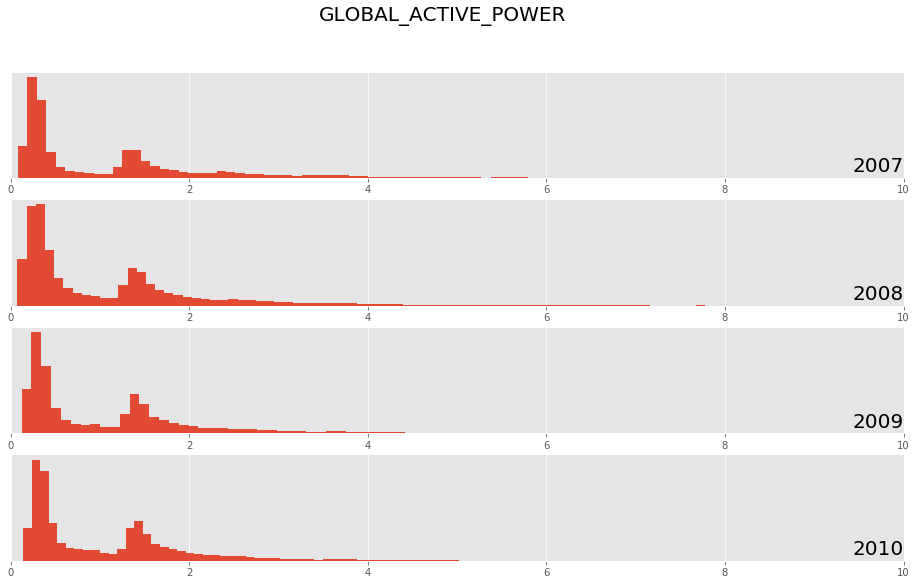

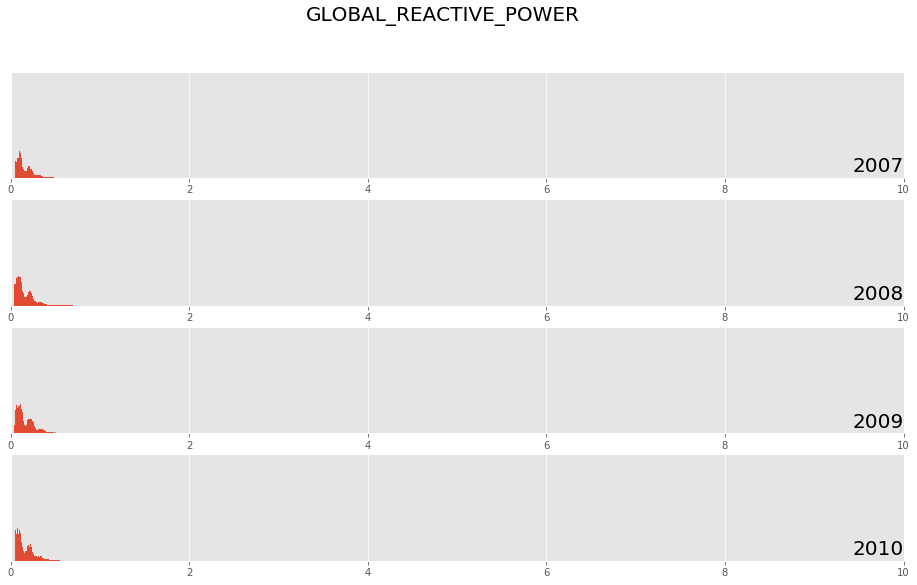

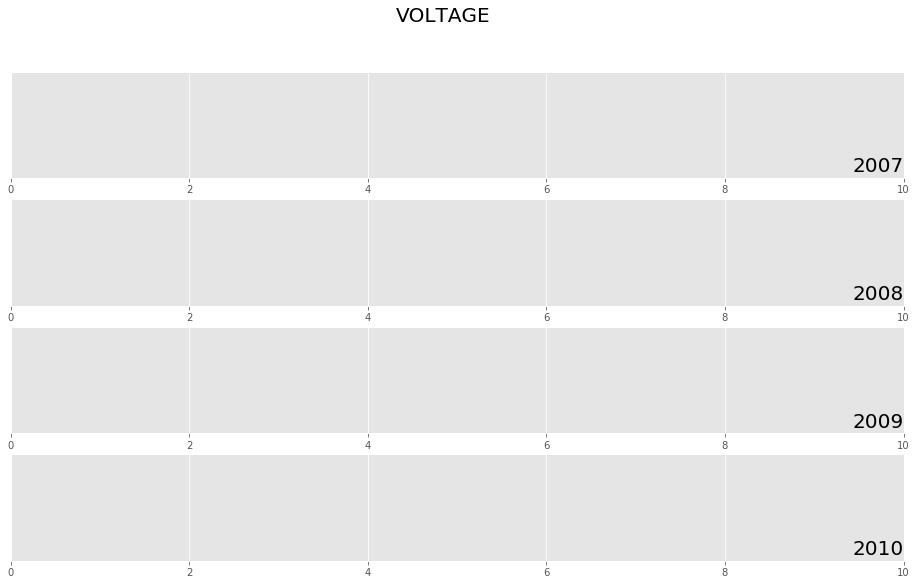

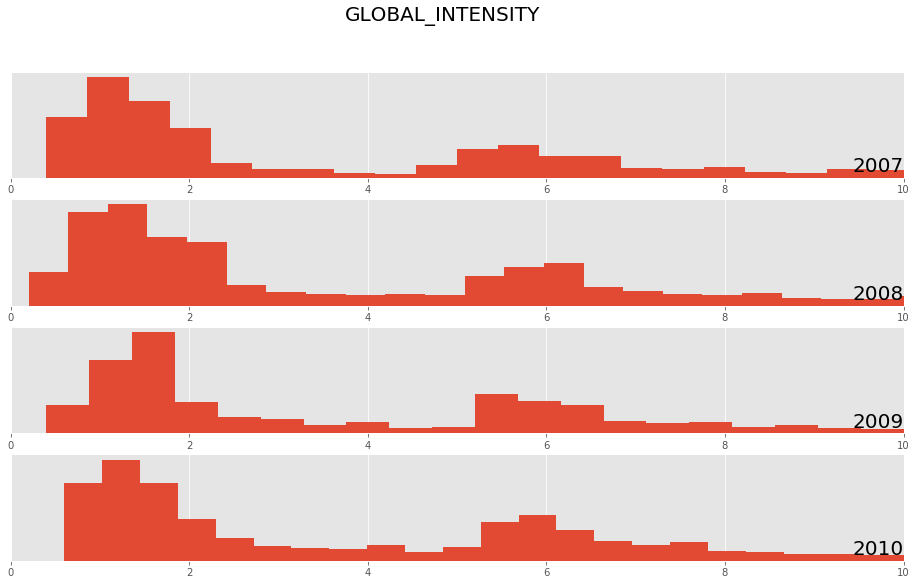

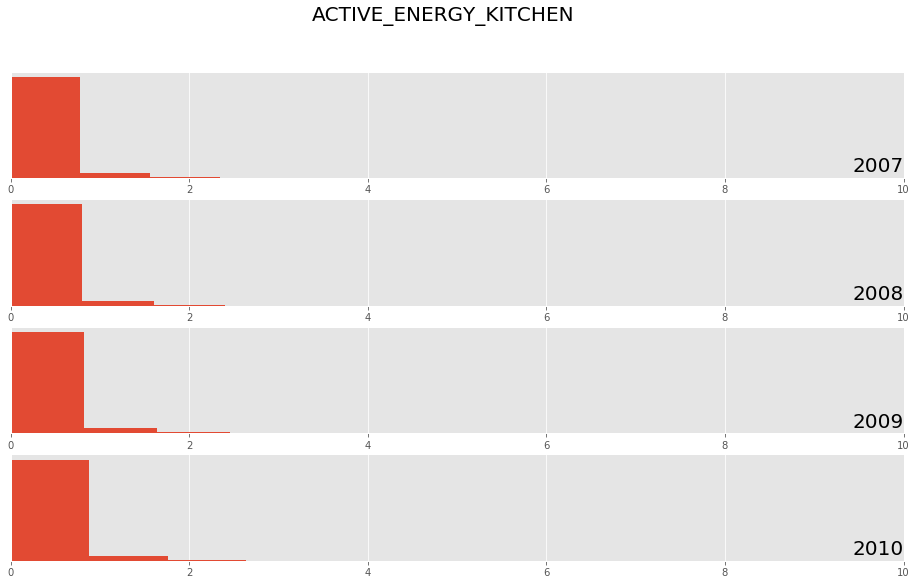

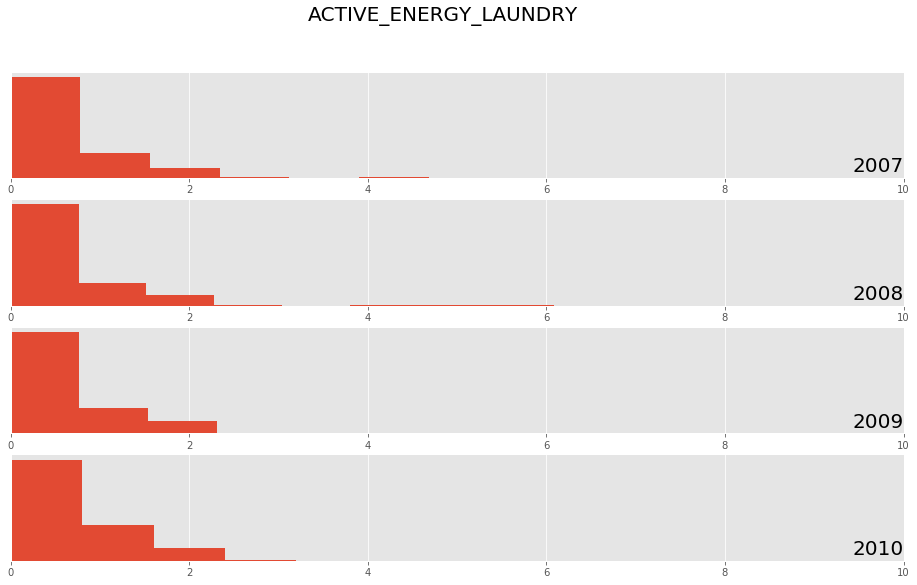

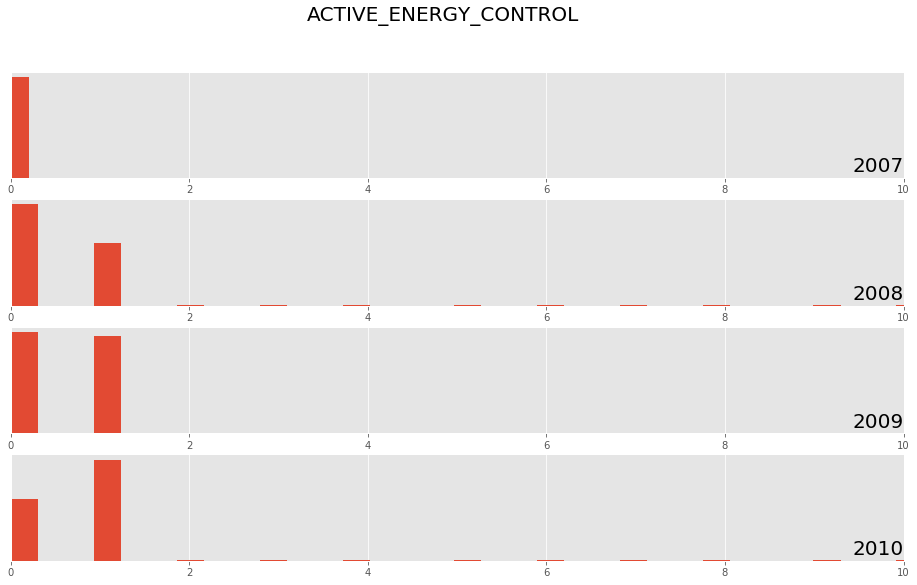

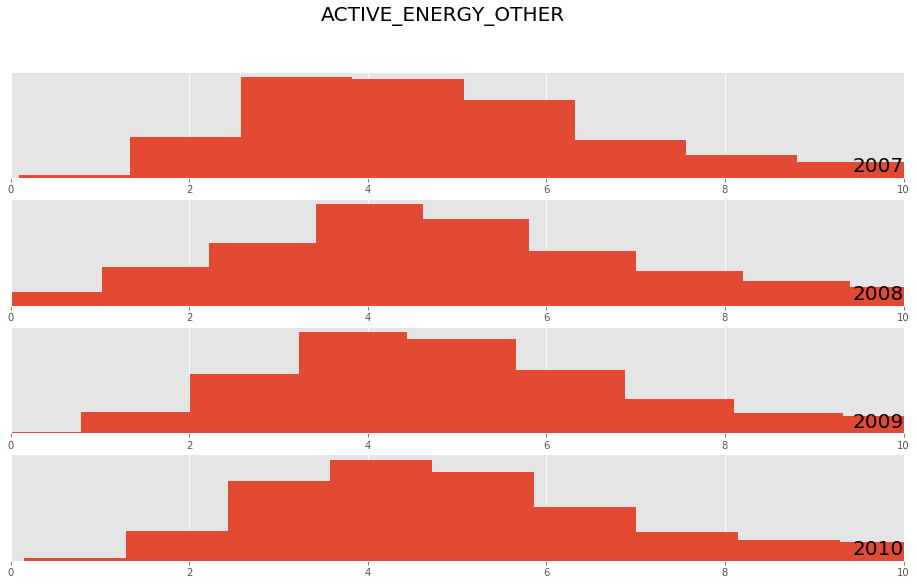

In [12]:
years = ['2007', '2008', '2009', '2010']

def year_distribution(data, variable):
    plt.figure(figsize=(16,9))
    for i in range(len(years)):
        ax = plt.subplot(len(years), 1, i+1)
        plt.suptitle(variable.upper(), fontsize=(20))
        year = years[i]
        year_data = data[str(year)]
        year_data[variable].hist(bins=100)
        ax.set_xlim(0, 10)
        plt.title(str(year), y=0, loc='right', fontdict={'fontsize': 20})
        plt.yticks([])
        
variables = data.columns
for variable in variables:
    year_distribution(data, variable=variable) 

It seems that across years there is a strong consistency with the bimodal nature of household energy consumption

Clustering in data such as this may prove useful in later predictive modelling

In [ ]:
# gonna need to sort out that function because of the bins

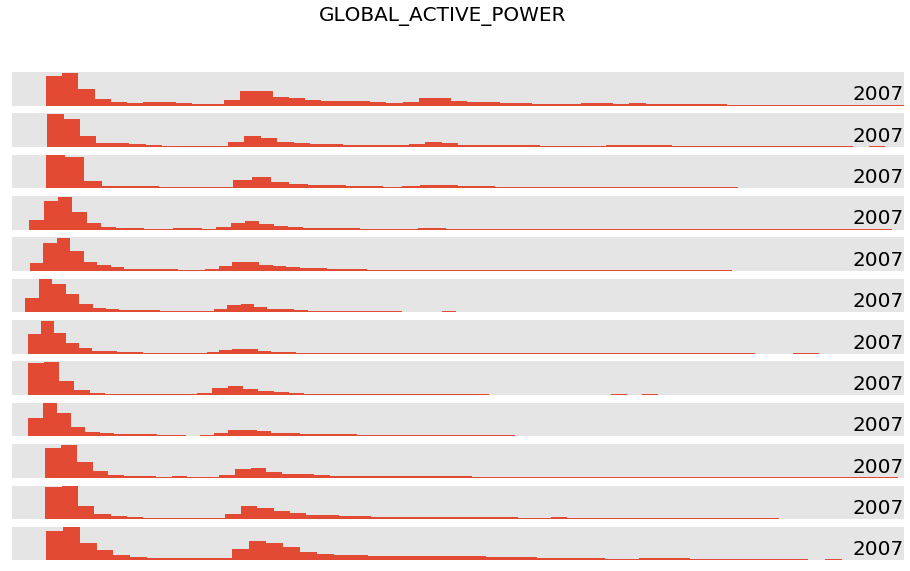

In [19]:
months = ["%.2d" % x for x in range(1, 13)]

def month_hists(data, variable, year):
    plt.figure(figsize=(16,9))
    for i in range(len(months)):
        ax = plt.subplot(len(months), 1, i+1)
        plt.suptitle(variable.upper(), fontsize=(20))
        month = year + '-' + str(months[i])
        month_data = data[str(month)]
        month_data[variable].hist(bins=100)
        ax.set_xlim(0, 5)
        plt.title(str(year), y=0, loc='right', fontdict={'fontsize': 20})
        plt.yticks([])
        plt.xticks([])
        

month_hists(data=data, variable='global_active_power', year='2007')
plt.show();

In [ ]:
# for now EDA is done, need to get onto data preparation for modelling